## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

# Part One: Exploration data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
# get info on the data
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

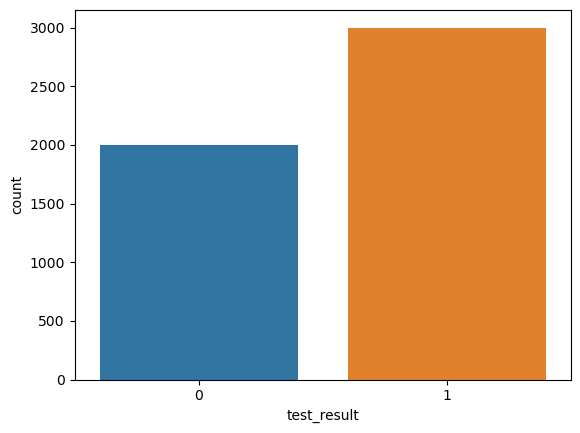

In [7]:
# show the count of each categorie
sns.countplot(data=df, x='test_result');

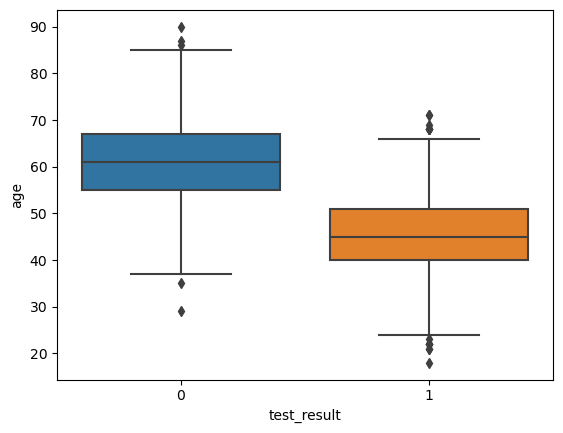

In [9]:
# see the distribution a of result base on age ( the younger you are the more you pass the test )
sns.boxplot(x="test_result",y="age",data=df);

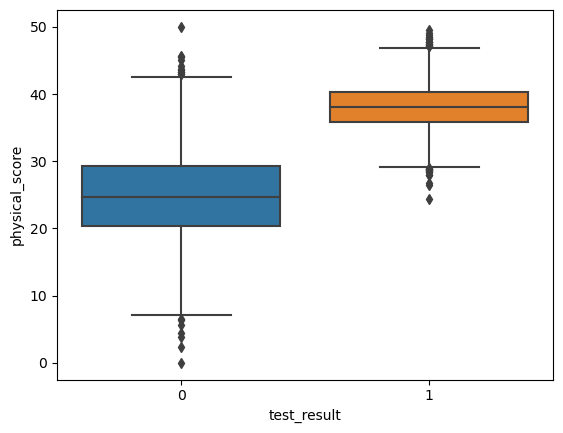

In [10]:
# see the distribution base on physical_score ( the greater the physical_score the more you pass the test)
sns.boxplot(x="test_result",y="physical_score",data=df);

<Axes: xlabel='age', ylabel='physical_score'>

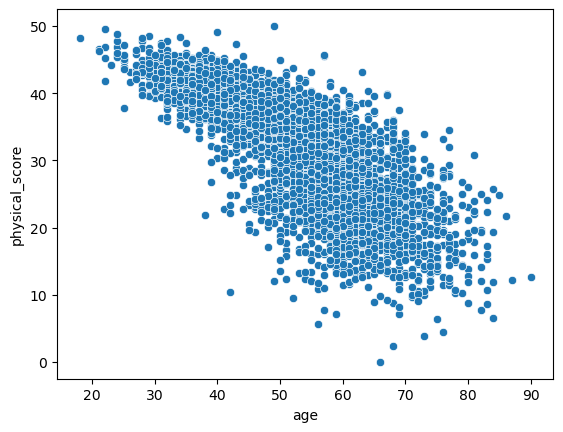

In [11]:
sns.scatterplot(data=df, x="age", y="physical_score");

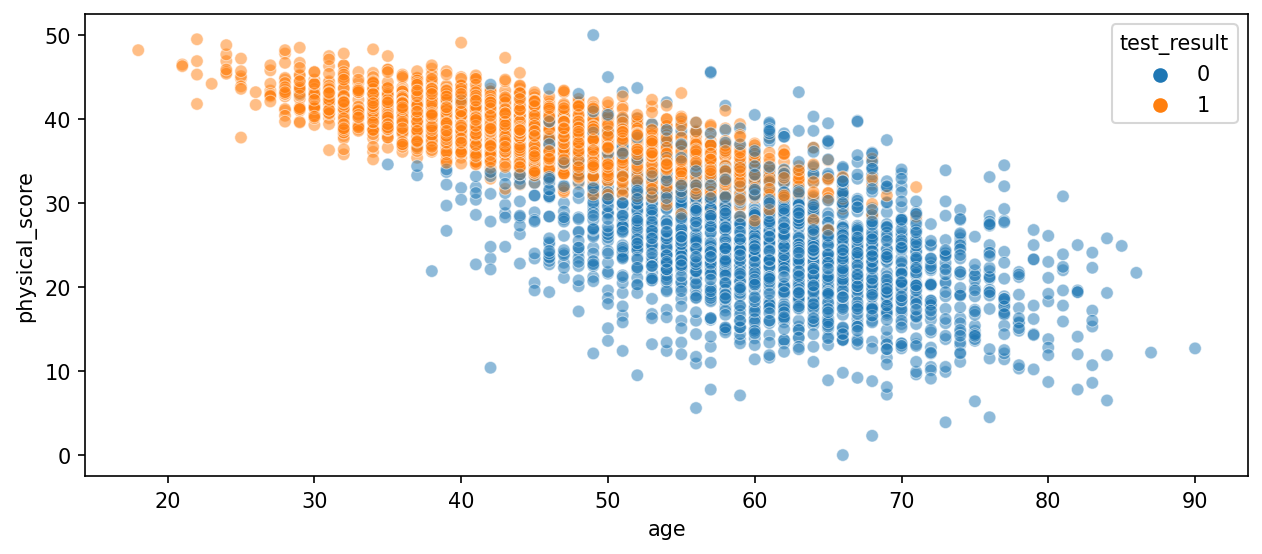

In [15]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=df, x="age", y="physical_score", hue="test_result", alpha=.5);

/Users/brandonkwamou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


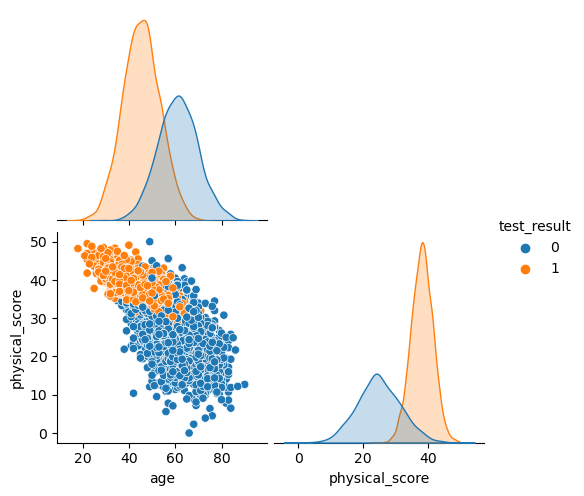

In [16]:
sns.pairplot(df, hue="test_result",corner=True)

<Axes: >

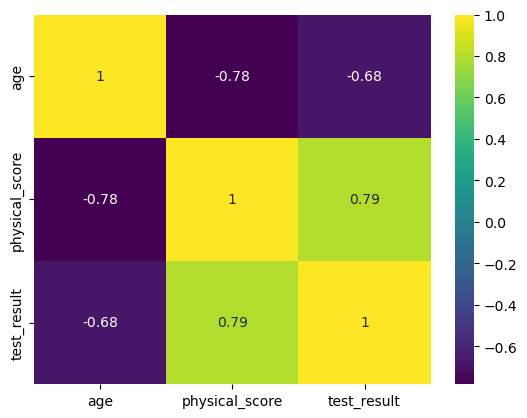

In [20]:
# analyze the correlation between the features
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<Axes: xlabel='physical_score', ylabel='test_result'>

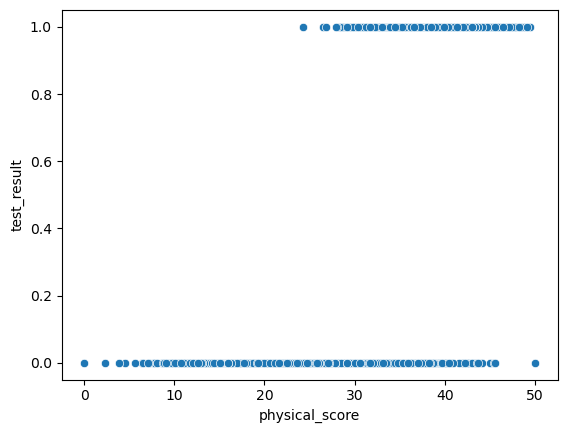

In [21]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

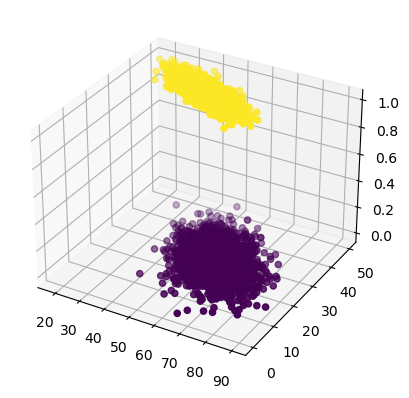

In [22]:
# scatterplot in 3D
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

# Part Two: Creating and Training a Model

In [23]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [24]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [28]:
scaler = StandardScaler()

In [29]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [33]:
# the higher the coef the more it is impactant on the target label (age, physical_score)
log_model.coef_

array([[-0.94953524,  3.45991194]])

# Part Three: Performance Evaluation

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
y_pred = log_model.predict(scaled_X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.93

In [39]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

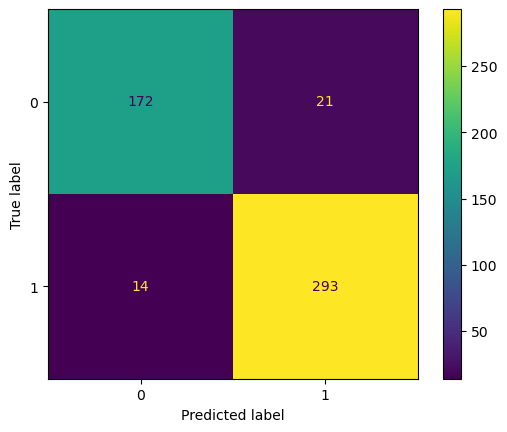

In [50]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test ,y_test);

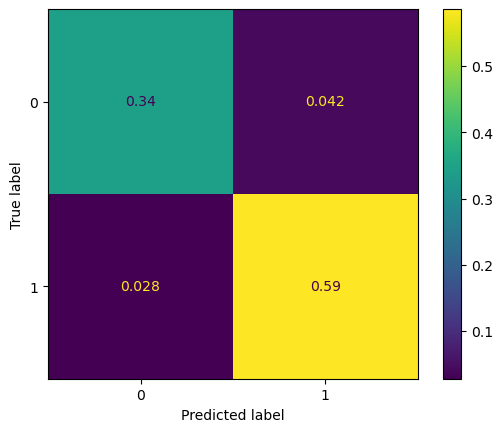

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred ,normalize="all");

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [56]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

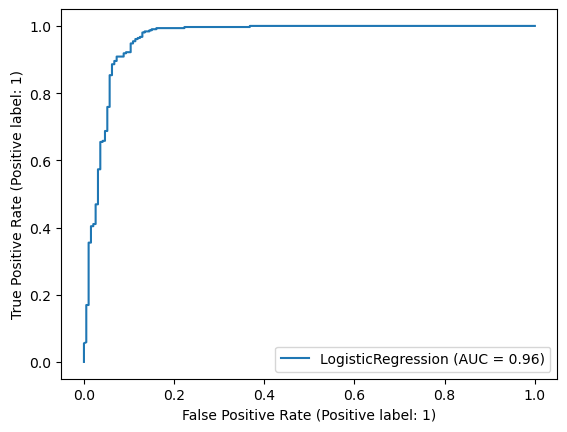

In [59]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

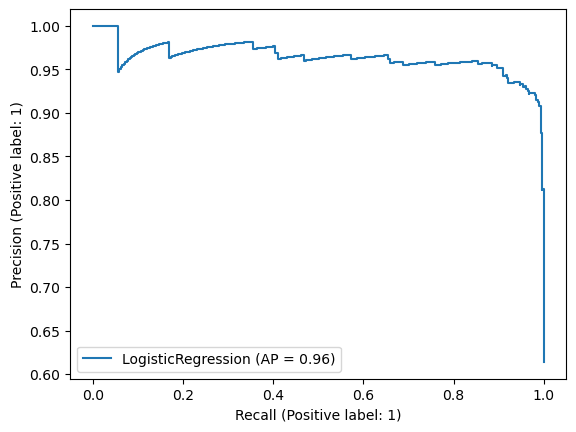

In [58]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [60]:
# probability of bellonging to each class
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [65]:
y_test[0]

1